<a href="https://colab.research.google.com/github/JOEL1706/data-Science/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [ ]:
#Load the data set
Titanic_train = pd.read_csv("Titanic_train.csv")
Titanic_test = pd.read_csv("Titanic_test.csv")
Titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###Data Exploration & Data preprocessing  

In [ ]:
Titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
Titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [ ]:
Titanic_train.drop(["Name","PassengerId","Ticket","Cabin"],inplace=True,axis = 1)

In [ ]:
Titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
Titanic_test.drop(["Name","PassengerId","Ticket","Cabin"],inplace=True,axis = 1)

In [ ]:
Titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [ ]:
Titanic_train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
Titanic_train.dropna(inplace=True)

In [ ]:
Titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
Titanic_train.reset_index(inplace=True)

In [ ]:
Titanic_train

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,male,22.0,1,0,7.2500,S
1,1,1,1,female,38.0,1,0,71.2833,C
2,2,1,3,female,26.0,0,0,7.9250,S
3,3,1,1,female,35.0,1,0,53.1000,S
4,4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
707,885,0,3,female,39.0,0,5,29.1250,Q
708,886,0,2,male,27.0,0,0,13.0000,S
709,887,1,1,female,19.0,0,0,30.0000,S
710,889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
Titanic_train.drop(['index'],inplace= True,axis=1)

In [ ]:
Titanic_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
Titanic_train.isnull().sum()

,0
index,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
Titanic_test.isnull().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


In [ ]:
Titanic_test.dropna(inplace=True)

In [ ]:
Titanic_test.reset_index(inplace=True)

In [ ]:
Titanic_test.drop(['index'],inplace= True,axis=1)

In [ ]:
Titanic_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [ ]:
Titanic_train=pd.get_dummies(Titanic_train,dtype='int')

In [ ]:
Titanic_train.head()

,index,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
Titanic_test=pd.get_dummies(Titanic_test,dtype='int')


In [ ]:
Titanic_test.head()

,index,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,34.5,0,0,7.8292,0,1,0,1,0
1,1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,3,27.0,0,0,8.6625,0,1,0,0,1
4,4,3,22.0,1,1,12.2875,1,0,0,0,1


In [ ]:
Titanic_train.corr(method='pearson')

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100,0.536762,-0.536762,0.195673,-0.048966,-0.159015
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893,-0.150826,0.150826,-0.279194,0.131989,0.197831
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143,-0.099037,0.099037,0.038268,-0.021693,-0.025431
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860,0.106296,-0.106296,-0.046227,0.051331,0.018968
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624,0.249543,-0.249543,-0.009523,-0.009417,0.013259
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000,0.182457,-0.182457,0.301337,-0.062346,-0.250994
Sex_female,0.536762,-0.150826,-0.099037,0.106296,0.249543,0.182457,1.000000,-1.000000,0.103611,0.027256,-0.109078
Sex_male,-0.536762,0.150826,0.099037,-0.106296,-0.249543,-0.182457,-1.000000,1.000000,-0.103611,-0.027256,0.109078
Embarked_C,0.195673,-0.279194,0.038268,-0.046227,-0.009523,0.301337,0.103611,-0.103611,1.000000,-0.095623,-0.884986
Embarked_Q,-0.048966,0.131989,-0.021693,0.051331,-0.009417,-0.062346,0.027256,-0.027256,-0.095623,1.000000,-0.378859


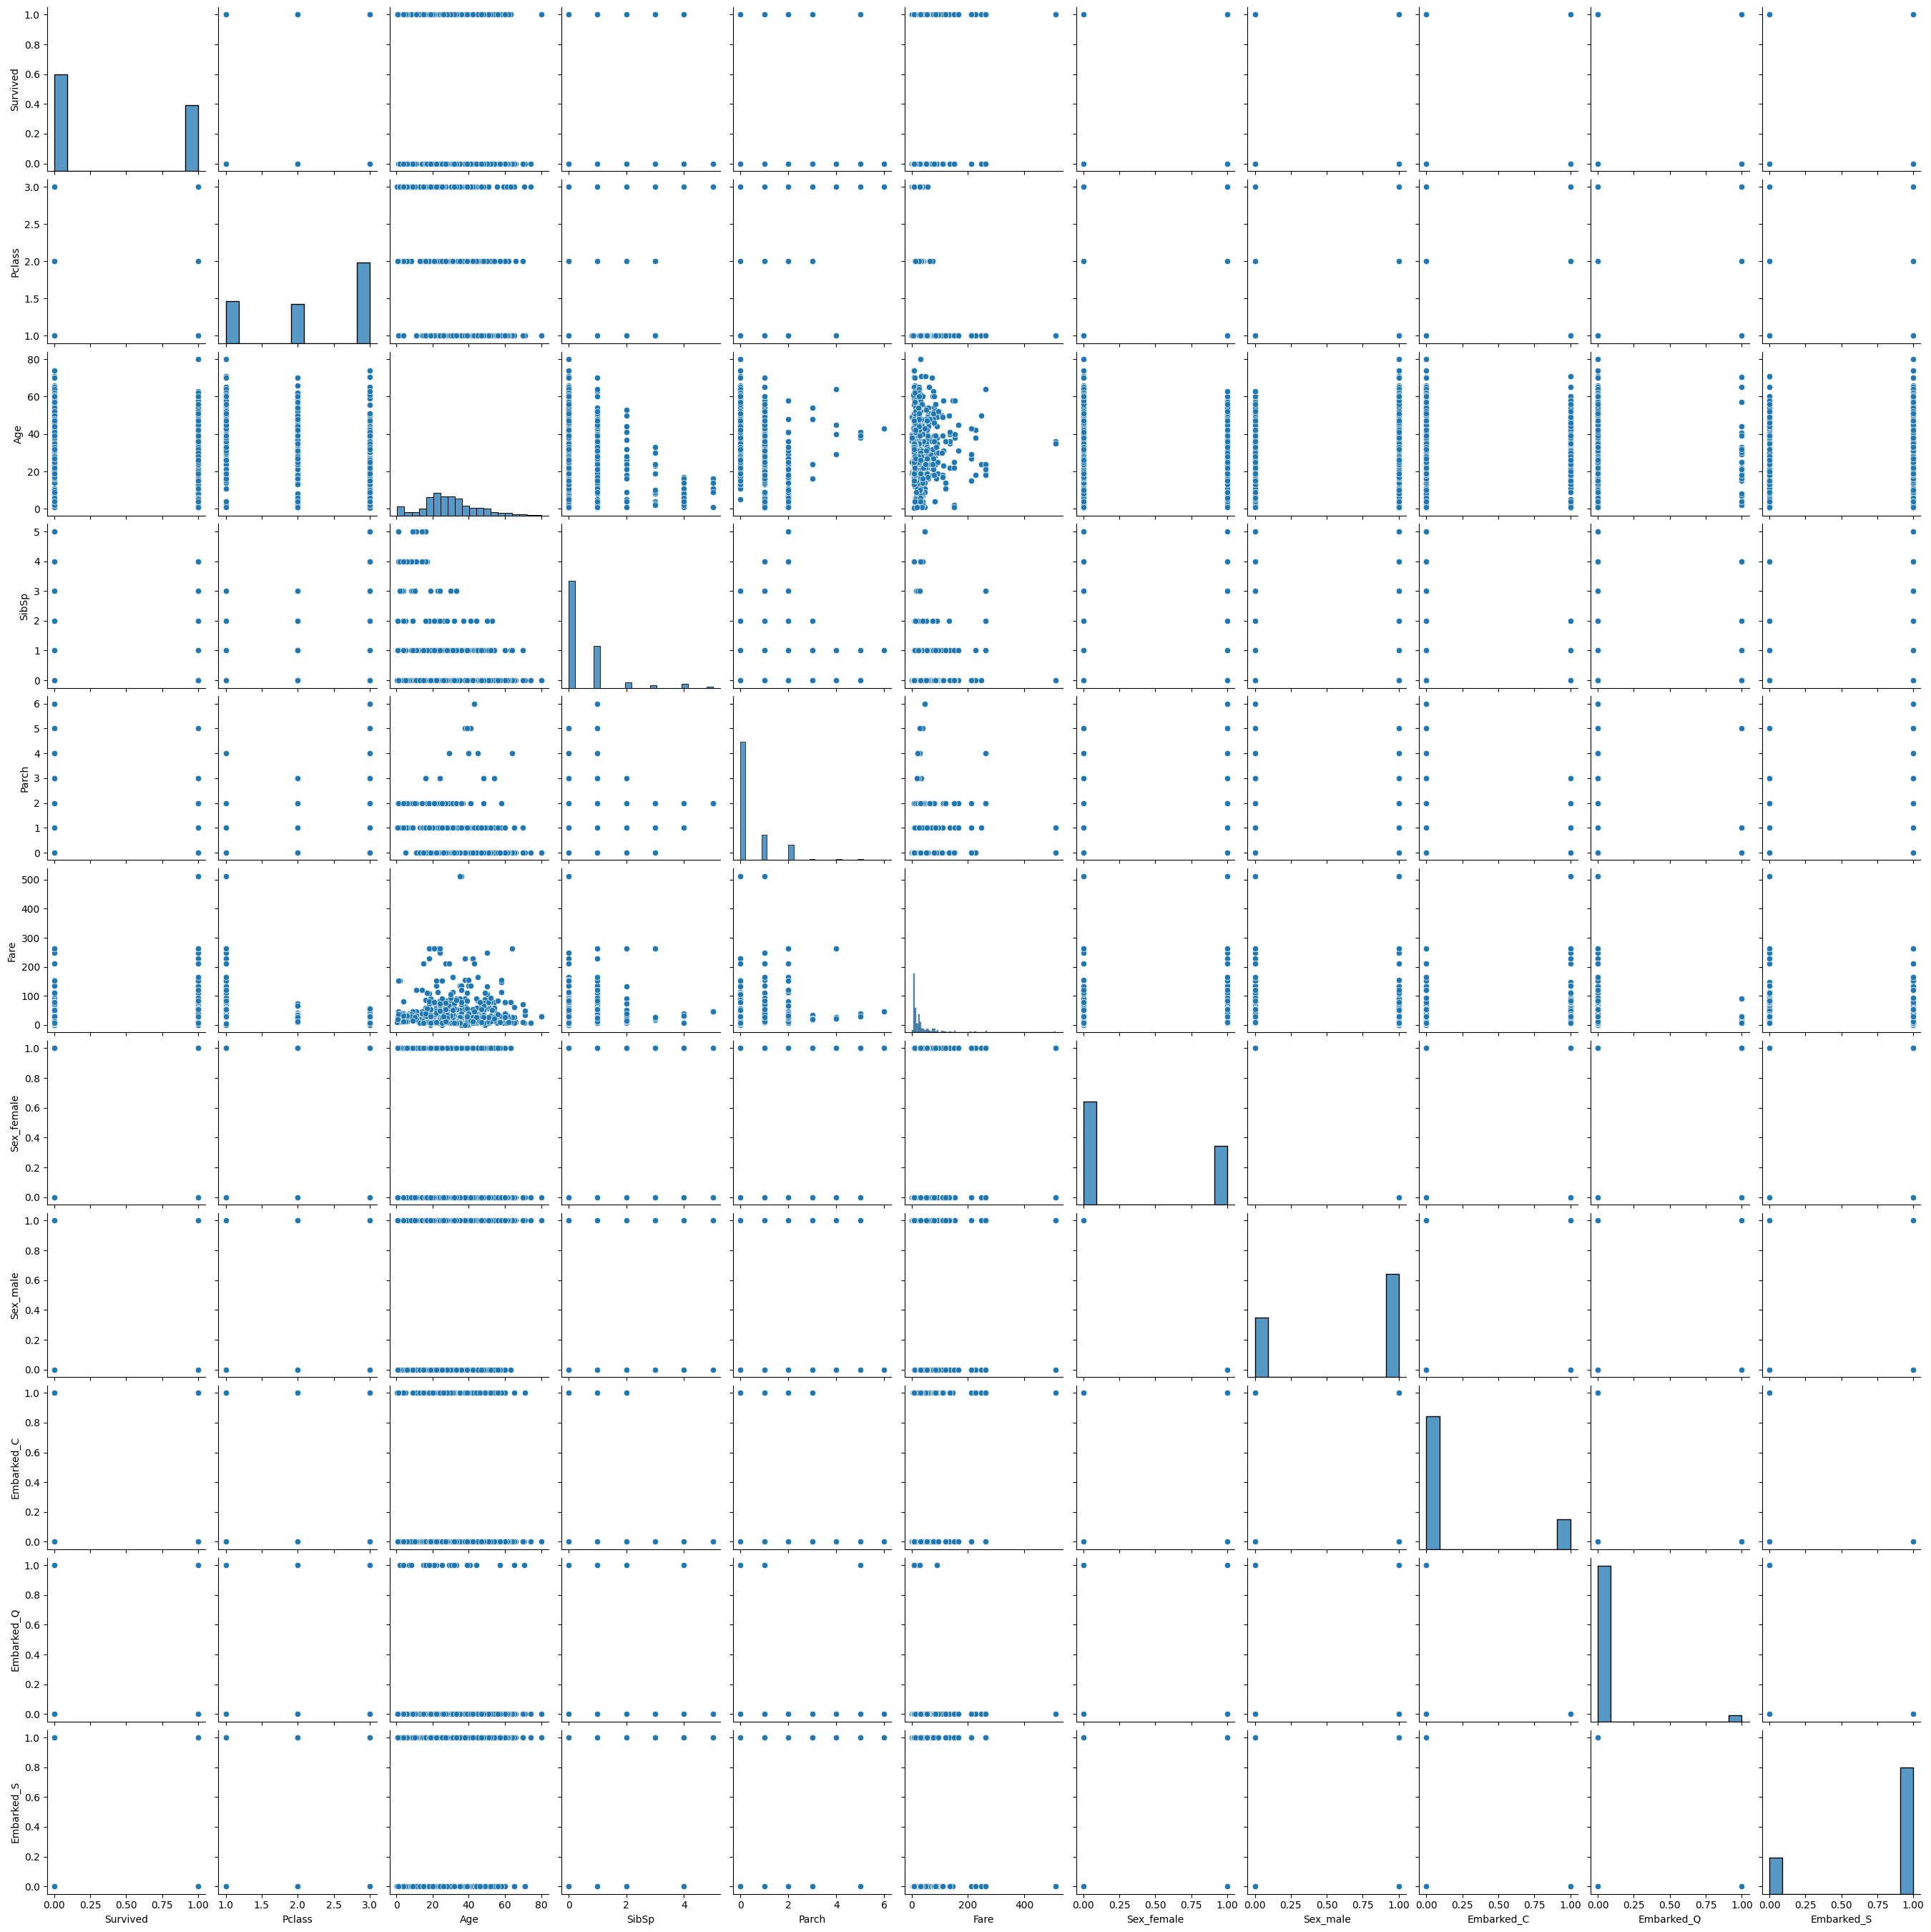

In [ ]:
import seaborn as sns
sns.pairplot(Titanic_train)

###Modeling building

In [ ]:
X = Titanic_train.iloc[:,1:]
Y = Titanic_train.iloc[:,0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0])

In [ ]:
surv=classifier.predict(Titanic_test)
surv

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,

###Model evaluation

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[72  8]
 [20 43]]


In [ ]:
accuracy_score=((72+43)/(72+8+20+43))*100
accuracy_score

80.41958041958041

In [ ]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        80
           1       0.84      0.68      0.75        63

    accuracy                           0.80       143
   macro avg       0.81      0.79      0.80       143
weighted avg       0.81      0.80      0.80       143



In [ ]:
classifier.predict_proba(X_test)

array([[0.03749928, 0.96250072],
       [0.13483261, 0.86516739],
       [0.73950212, 0.26049788],
       [0.05964903, 0.94035097],
       [0.74058661, 0.25941339],
       [0.30024658, 0.69975342],
       [0.56593533, 0.43406467],
       [0.15051719, 0.84948281],
       [0.62717971, 0.37282029],
       [0.36914232, 0.63085768],
       [0.8801547 , 0.1198453 ],
       [0.86782774, 0.13217226],
       [0.89070453, 0.10929547],
       [0.76939179, 0.23060821],
       [0.58292473, 0.41707527],
       [0.92018113, 0.07981887],
       [0.12661252, 0.87338748],
       [0.90337235, 0.09662765],
       [0.05044084, 0.94955916],
       [0.13154383, 0.86845617],
       [0.89070453, 0.10929547],
       [0.31379592, 0.68620408],
       [0.03828099, 0.96171901],
       [0.83693026, 0.16306974],
       [0.9093793 , 0.0906207 ],
       [0.27496052, 0.72503948],
       [0.90456019, 0.09543981],
       [0.24752118, 0.75247882],
       [0.91493762, 0.08506238],
       [0.276279  , 0.723721  ],
       [0.

Text(0, 0.5, 'True Positive Rate')

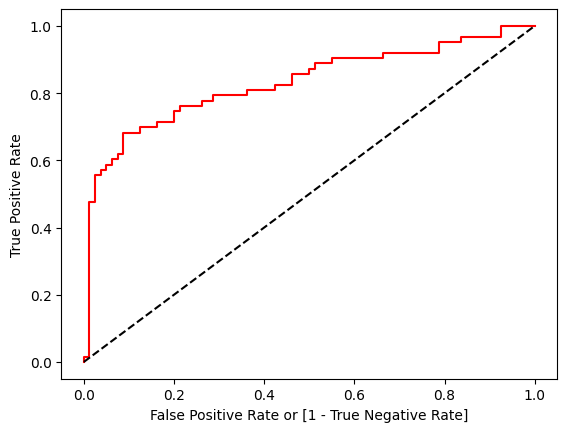

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test , classifier.predict_proba (X_test)[:,1:])

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

###Deployment with streamlit

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [ ]:
import streamlit as st

In [ ]:
def predict_survival(Pclass, Sex, Age, SibSp, Parch, Fare, Embarked):
    features = np.array([[Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]])
    features = scaler.transform(features)
    prediction = model.predict(features)
    return 'Survived' if prediction[0] == 1 else 'Did Not Survive'

st.title('Titanic Survival Prediction')
Pclass = st.selectbox('Passenger Class', [1, 2, 3])
Sex = st.selectbox('Sex', ['Male', 'Female'])
Sex = 1 if Sex == 'Male' else 0
Age = st.number_input('Age', min_value=1, max_value=100, value=25)
SibSp = st.number_input('Siblings/Spouses Aboard', min_value=0, max_value=10, value=0)
Parch = st.number_input('Parents/Children Aboard', min_value=0, max_value=10, value=0)
Fare = st.number_input('Fare', min_value=0.0, value=50.0)
Embarked = st.selectbox('Port of Embarkation', ['C', 'Q', 'S'])
Embarked = {'C': 0, 'Q': 1, 'S': 2}[Embarked]

if st.button('Predict'):
    result = predict_survival(Pclass, Sex, Age, SibSp, Parch, Fare, Embarked)
    st.write(f'Prediction: {result}')

2025-02-24 15:15:28.710 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 15:15:28.894 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-02-24 15:15:28.898 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 15:15:28.901 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 15:15:28.904 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 15:15:28.907 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 15:15:28.910 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 15:15:28.912 Session state does not 

In [ ]:

import pandas as pd
import streamlit as st
from sklearn.linear_model import LogisticRegression

st.title('Model Deployment: Logistic Regression')

st.sidebar.header('User Input Parameters')

def user_input_features():
    CLMSEX = st.sidebar.selectbox('Gender',('1','0'))
    CLMINSUR = st.sidebar.selectbox('Insurance',('1','0'))
    SEATBELT = st.sidebar.selectbox('SeatBelt',('1','0'))
    CLMAGE = st.sidebar.number_input("Insert the Age")
    LOSS = st.sidebar.number_input("Insert Loss")
    data = {'CLMSEX':CLMSEX,
            'CLMINSUR':CLMINSUR,
            'SEATBELT':SEATBELT,
            'CLMAGE':CLMAGE,
            'LOSS':LOSS}
    features = pd.DataFrame(data,index = [0])
    return features

df = user_input_features()
st.subheader('User Input parameters')
st.write(df)

claimants = pd.read_csv(r"C:\Users\excel\OneDrive\Documents\Day-wise PPT\Day 16-Deployment\Python - Streamlit\claimants.csv")
claimants.drop(["CASENUM"],inplace=True,axis = 1)
claimants = claimants.dropna()

X = claimants.iloc[:,[1,2,3,4,5]]
Y = claimants.iloc[:,0]
clf = LogisticRegression()
clf.fit(X,Y)


prediction = clf.predict(df)
prediction_proba = clf.predict_proba(df)

st.subheader('Predicted Result')
st.write('The claimant not represent by attorney' if prediction_proba[0][1] > 0.5 else 'The claimant represented by attorney')

st.subheader('Prediction Probability')
st.write(prediction_proba)
1.logistic.py

Displaying 1.logistic.py.

###Interview questions:

1) What is the difference between precision and recall?

A) Precision measures how many of the predicted positive cases were actually positive.
Recall measures how many of the actual positive cases were correctly identified by the model.


2) What is cross-validation, and why is it important in binary classification?

A) Cross-validation is a technique used to assess the performance of a machine learning model by splitting the dataset into multiple subsets. Cross-validation is crucial in binary classification because it provides a reliable way to access how well a model will perform on new, unseen data by evaluating its performance on multiple subsets of the training data, preventing overfitting and ensuring the model generalizes well to real-world scenarios where it will encounter new data points, not just the specific training set used to fit the mode.